# Exploratory Data Analysis – Diabetes Dataset

This notebook contains data inspection, missing value checks, and initial feature understanding for the diabetes classification task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("../data/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import numpy as np

cols_with_zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 📊 1. Class Distribution of Outcome

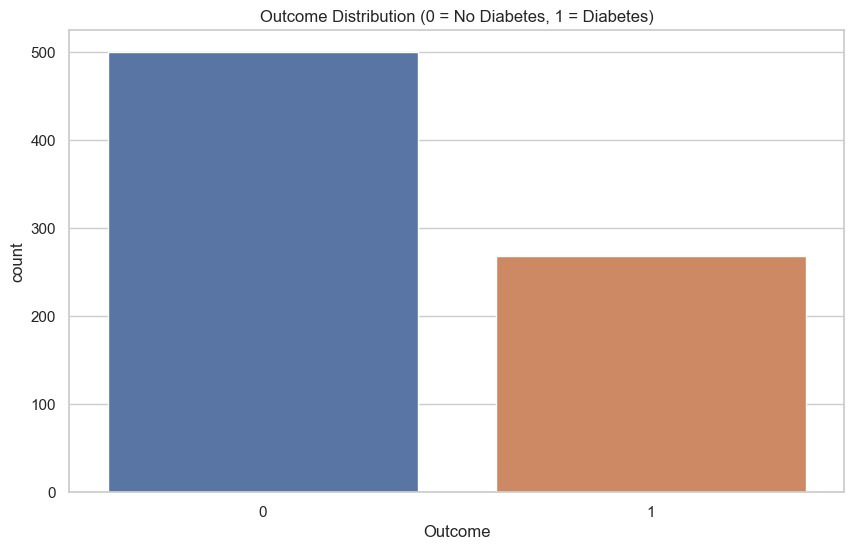

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [6]:
# Visualize the distribution of the target variable (Outcome)
sns.countplot(data=df, x='Outcome')
plt.title("Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# Show class proportions
print(df['Outcome'].value_counts(normalize=True))


> The target variable `Outcome` is not severely imbalanced — around 65% have no diabetes, while 35% do.  
> This means the class distribution is acceptable for model training without the need for special class balancing techniques.

### 🔗 2. Correlation Heatmap

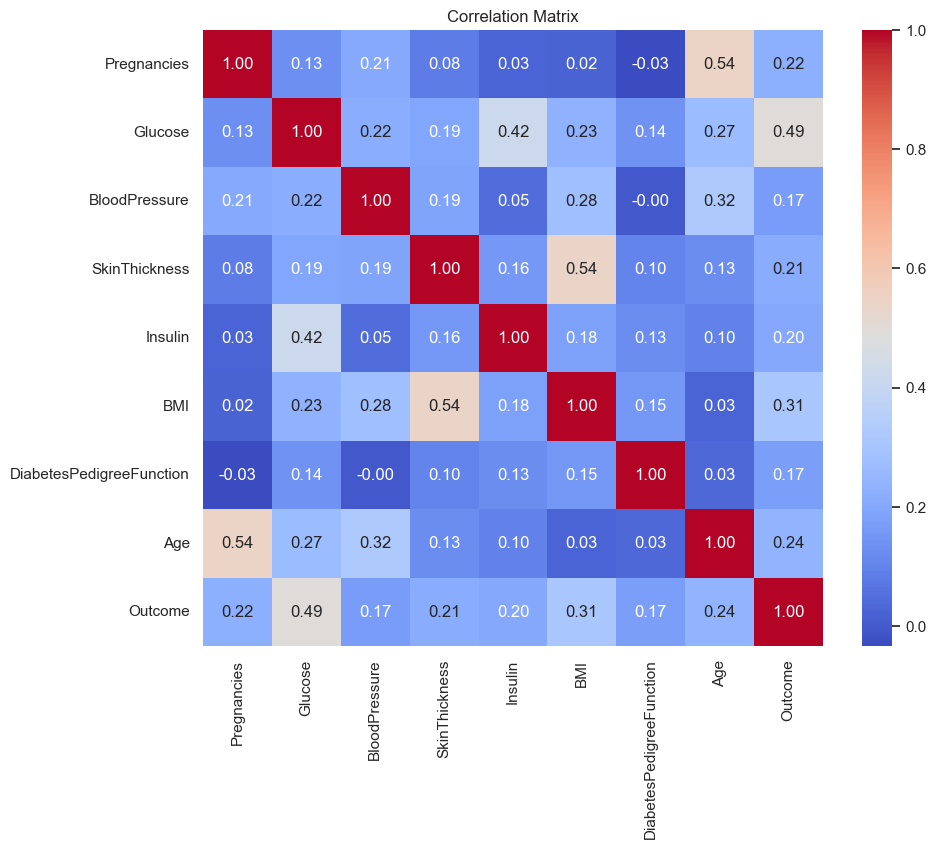

In [7]:
# Compute correlation matrix
corr = df.corr()

# Draw heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


> The features with the highest positive correlation with the `Outcome` variable are:
> - **Glucose** (0.49)
> - **BMI** (0.31)
> - **Age** (0.24)
> - **Pregnancies** (0.22)  
> These features are likely to have a significant impact on the model's prediction performance.

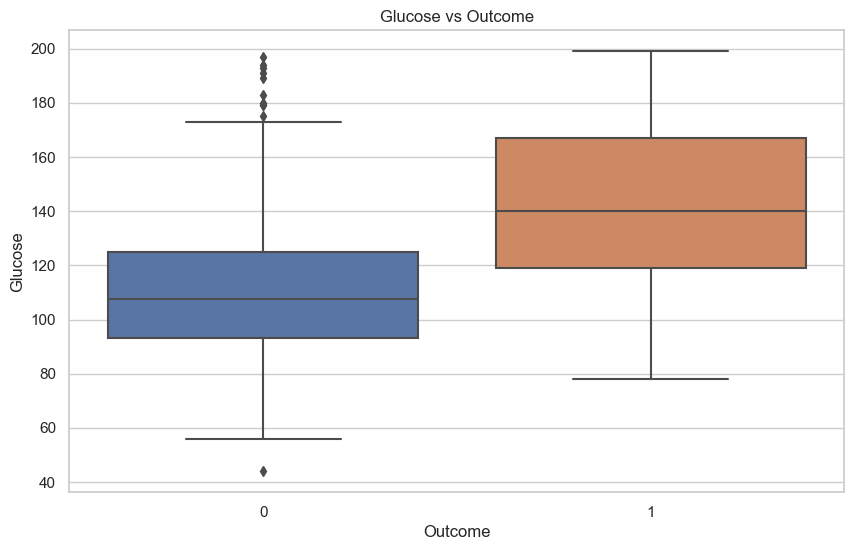

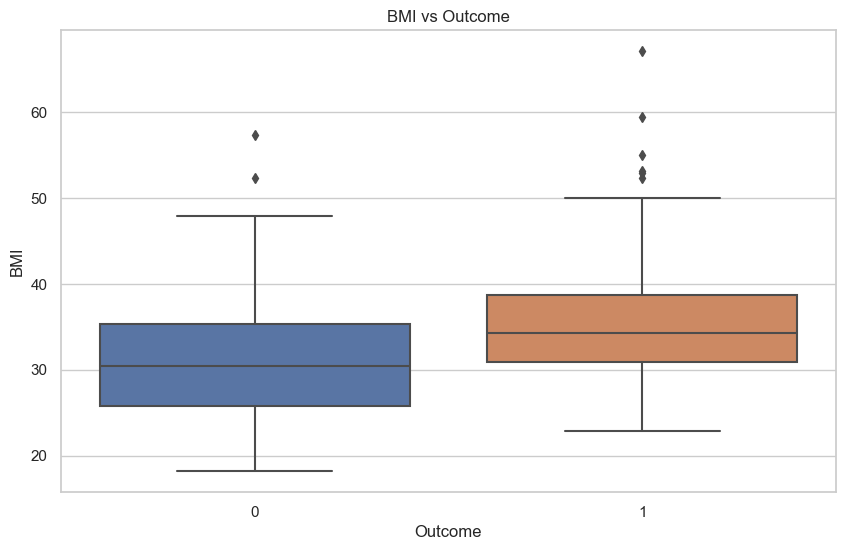

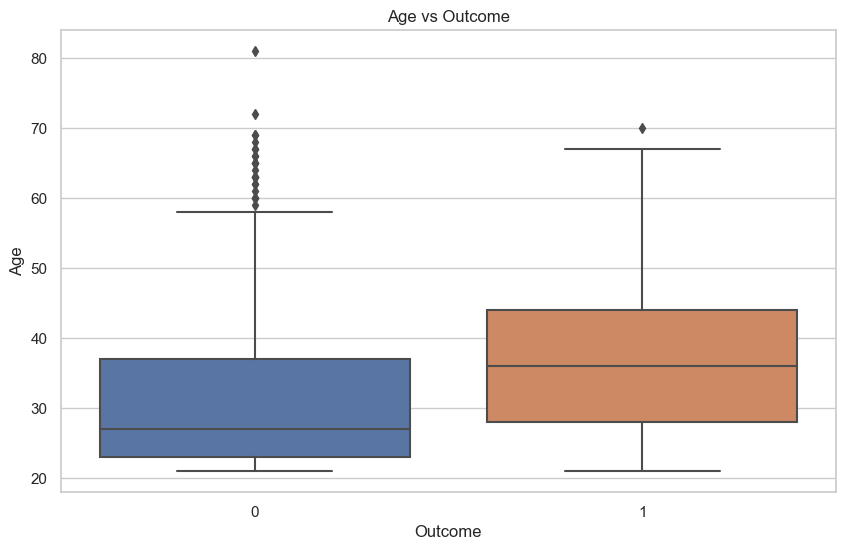

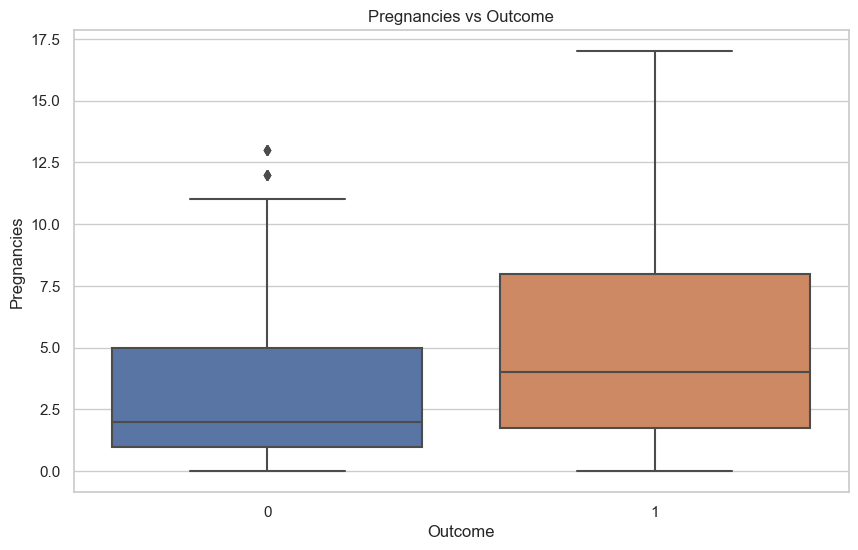

In [8]:
# Boxplots for important features vs Outcome
important_features = ['Glucose', 'BMI', 'Age', 'Pregnancies']

for col in important_features:
    plt.figure()
    sns.boxplot(data=df, x='Outcome', y=col)
    plt.title(f"{col} vs Outcome")
    plt.show()

> Individuals with diabetes (Outcome = 1) tend to have significantly higher glucose levels compared to non-diabetic individuals. This makes `Glucose` a strong predictive feature.

> People with diabetes show a higher Body Mass Index (BMI) on average. This suggests that obesity may be a contributing factor to diabetes.

> The diabetic group (Outcome = 1) includes generally older individuals, indicating that age may increase diabetes risk.

> Diabetic individuals tend to have had more pregnancies. This could relate to gestational diabetes or other risk factors associated with pregnancy.